In [1]:
from os import read
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
from csv import reader
import matplotlib.pyplot as plt
import numpy as np

#Create connection function
def creat_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)
    return conn

#Create table function
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
#Execute SQL statement function        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    rows = cur.fetchall()
    return rows

#Create the normalized database with the file Airfare_Predcition.csv
normalized_database_name = 'normalized_airfare_prediction.db'

conn = creat_connection(normalized_database_name)

#SQL statement for creating Years table
sql_statement_year = """
CREATE TABLE [Years](
    [ID] INTEGER PRIMARY KEY AUTOINCREMENT,
    [Year] INTEGER UNIQUE NOT NULL
);
"""
create_table(conn, sql_statement_year)

#SQL statement for creating Quarters table
sql_statement_quarter = """
CREATE TABLE [Quarters](
    [ID] INTEGER PRIMARY KEY AUTOINCREMENT,
    [Quarter] INTEGER UNIQUE NOT NULL
);
"""
create_table(conn, sql_statement_quarter)

#SQL statement for creating Carriers table
sql_statement_carrier = """
CREATE TABLE [Carriers](
    [ID] INTEGER PRIMARY KEY AUTOINCREMENT,
    [Code] TEXT UNIQUE NOT NULL
);
"""
create_table(conn, sql_statement_carrier)

#SQL statement for creating Airports table
sql_statement_airport = """
CREATE TABLE [Airports](
    [ID] INTEGER PRIMARY KEY AUTOINCREMENT,
    [Name] TEXT UNIQUE NOT NULL
);
"""
create_table(conn,sql_statement_airport)

#SQL statement for creating Airfares table
sql_statement_airfare = """
CREATE TABLE [Airfares](
    [ID] INTEGER PRIMARY KEY AUTOINCREMENT,
    [Origin] INTEGER NOT NULL,
    [Destination] INTEGER NOT NULL,
    [Average_Fare] REAL NOT NULL,
    [Distance] REAL NOT NULL,
    [Year_ID] INTEGER NOT NULL,
    [Quarter_ID] INTEGER NOT NULL,
    [CLg_ID] INTEGER NOT NULL,
    [CLow_ID] INTEGER NOT NULL,
    FOREIGN KEY(Origin) REFERENCES Airports(ID),
    FOREIGN KEY(Destination) REFERENCES Airports(ID),
    FOREIGN KEY(Year_ID) REFERENCES Years(ID),
    FOREIGN KEY(Quarter_ID) REFERENCES Quarters(ID),
    FOREIGN KEY(CLg_ID) REFERENCES Carriers(ID),
    FOREIGN KEY(CLow_ID) REFERENCES Carriers(ID)
);
"""
create_table(conn, sql_statement_airfare)

#Initialize sets for Years, Quarters, Carriers, Airports respectively
year_list = set()
quarter_list = set()
carrier_list = set()
airport_list = set()

#Read the file and extract values to store in the sets mentioned above
with open('Airfare_Prediction.csv') as file:
    next(file)
    for i in reader(file):
        if(i[0] not in year_list):
            year_list.add(i[0])
        if(i[1] not in quarter_list):
            quarter_list.add(i[1])
        if(i[2] not in airport_list):
            airport_list.add(i[2])
        if(i[3] not in airport_list):
            airport_list.add(i[3])
        if(i[6] not in carrier_list):
            carrier_list.add(i[6])
        if(i[7] not in carrier_list):
            carrier_list.add(i[7])

#Iterate through each of the set and add to the tables   
for i in year_list:
    sql_statement_insert_year = "INSERT INTO [Years] (Year) VALUES({})".format(i)
    execute_sql_statement(sql_statement_insert_year, conn)
conn.commit()
     
for i in quarter_list:
    sql_statement_insert_quarter = "INSERT INTO [Quarters] (Quarter) VALUES({})".format(i)
    execute_sql_statement(sql_statement_insert_quarter, conn)
conn.commit()
       
for i in carrier_list:
    sql_statement_insert_carrier = "INSERT INTO [Carriers] (Code) VALUES('{}')".format(i)
    execute_sql_statement(sql_statement_insert_carrier, conn)
conn.commit()
       
for i in airport_list:
    sql_statement_destinations = "INSERT INTO [Airports] (Name) VALUES('{}')".format(i)
    execute_sql_statement(sql_statement_destinations,conn)
conn.commit()

with open('Airfare_Prediction.csv') as file:
    next(file)
    for i in reader(file):
        year_id = execute_sql_statement("SELECT ID FROM Years WHERE Year={}".format(i[0]),conn)[0][0]
        quarter_id = execute_sql_statement("SELECT ID FROM Quarters WHERE Quarter={}".format(i[1]),conn)[0][0]
        origin = execute_sql_statement("SELECT ID FROM Airports WHERE Name='{}'".format(i[2]),conn)[0][0]
        destination = execute_sql_statement("SELECT ID FROM Airports WHERE Name='{}'".format(i[3]),conn)[0][0]
        carrier_lg = execute_sql_statement("SELECT ID FROM Carriers WHERE Code='{}'".format(i[6]),conn)[0][0]
        carrier_low = execute_sql_statement("SELECT ID FROM Carriers WHERE Code='{}'".format(i[7]),conn)[0][0]
        sql_statement_insert_airfares = """
            INSERT INTO [Airfares] 
            (Origin, Destination, Average_Fare, Distance, Year_ID, Quarter_ID, CLg_ID, CLow_ID) 
            VALUES ({},{},{},{},{},{},{},{})""".format(origin, destination,i[5],i[4],year_id,quarter_id,carrier_lg,carrier_low)
        execute_sql_statement(sql_statement_insert_airfares, conn)
    conn.commit()


In [2]:
#Display the Years table
sql_statement = "SELECT * FROM Years"
print(pd.read_sql_query(sql_statement, conn))

    ID  Year
0    1  1997
1    2  2019
2    3  2009
3    4  2005
4    5  1996
5    6  2010
6    7  1998
7    8  2013
8    9  2001
9   10  2016
10  11  2003
11  12  2021
12  13  2020
13  14  2002
14  15  1999
15  16  2007
16  17  2017
17  18  2011
18  19  2015
19  20  2004
20  21  2014
21  22  2018
22  23  2006
23  24  2000
24  25  2008
25  26  2012


In [3]:
#Display the Quarters table
sql_statement = "SELECT * FROM Quarters"
print(pd.read_sql_query(sql_statement, conn))

   ID  Quarter
0   1        1
1   2        2
2   3        3
3   4        4


In [4]:
#Display the Carriers table
sql_statement = "SELECT * FROM Carriers"
print(pd.read_sql_query(sql_statement, conn))

    ID Code
0    1     
1    2   NW
2    3   XJ
3    4   NJ
4    5   G4
5    6   RU
6    7   W9
7    8   9N
8    9   N5
9   10   AA
10  11   OO
11  12   QX
12  13   F9
13  14   WN
14  15   RP
15  16   P9
16  17   AS
17  18   US
18  19   TB
19  20   ZA
20  21   SY
21  22   TW
22  23   B6
23  24   AQ
24  25   SX
25  26   A7
26  27   FF
27  28   OE
28  29   FL
29  30   HP
30  31   PN
31  32   U5
32  33   WV
33  34   YV
34  35   QQ
35  36   J7
36  37   TZ
37  38   E9
38  39   W7
39  40   UA
40  41   CO
41  42   N7
42  43   T3
43  44   DH
44  45   NK
45  46   JI
46  47   KW
47  48   SM
48  49   DL
49  50   YX
50  51   ZW
51  52   KP
52  53   L4
53  54   VX
54  55   EV


In [5]:
#Display the Airports table
sql_statement = "SELECT * FROM Airports"
print(pd.read_sql_query(sql_statement, conn))

      ID                       Name
0      1       Colorado Springs, CO
1      2                Jackson, WY
2      3             Des Moines, IA
3      4               Portland, ME
4      5                 Toledo, OH
..   ...                        ...
169  170             Huntsville, AL
170  171            Sioux Falls, SD
171  172  Fort Collins/Loveland, CO
172  173           Indianapolis, IN
173  174             Sacramento, CA

[174 rows x 2 columns]


In [6]:
#Display the Airfares table
sql_statement = "SELECT * FROM Airfares"
print(pd.read_sql_query(sql_statement, conn))

            ID  Origin  Destination  Average_Fare  Distance  Year_ID  \
0            1      75           64        244.04     366.0        5   
1            2      87          122        196.84    1399.0        5   
2            3      94          111        194.06     325.0        5   
3            4     109           17        149.49    1460.0        5   
4            5     120          116        140.64     661.0        5   
...        ...     ...          ...           ...       ...      ...   
102015  102016      89           34        160.47    1111.0       12   
102016  102017      93          101        201.60     684.0       12   
102017  102018      93          116        130.13     724.0       12   
102018  102019      93           34        108.25     550.0       12   
102019  102020      93          114         75.66     511.0       12   

        Quarter_ID  CLg_ID  CLow_ID  
0                3      18       49  
1                4       2       13  
2                2   

In [7]:
#SQL statement to generate the entire table with normalized values
sql_statement_table = """
    SELECT Years.Year,
        Quarters.Quarter,
        Origin.Name AS Origin,
        Destination.Name AS Destination,
        Airfares.Average_Fare, 
        Airfares.Distance,
        Carrier_LG.Code AS Carrier_LG,
        Carrier_Low.Code AS Carrier_Low
    FROM Airfares
    INNER JOIN Years ON Years.ID = Airfares.Year_ID
    INNER JOIN Quarters ON Quarters.ID = Airfares.Quarter_ID
    INNER JOIN Airports AS Origin ON Origin.ID = Airfares.Origin
    INNER JOIN Airports AS Destination ON Destination.ID = Airfares.Destination
    INNER JOIN Carriers AS Carrier_LG ON Carrier_LG.ID = Airfares.CLg_ID
    INNER JOIN Carriers AS Carrier_Low ON Carrier_Low.ID = Airfares.CLow_ID
"""

df = pd.read_sql_query(sql_statement_table, conn)

/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1119167094.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aa_average=df.where(df['Carrier_LG']=='AA').mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1119167094.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ua_average=df.where(df['Carrier_LG']=='UA').mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1119167094.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo

Text(0.5, 1.0, '5 Major Carriers and their average fares')

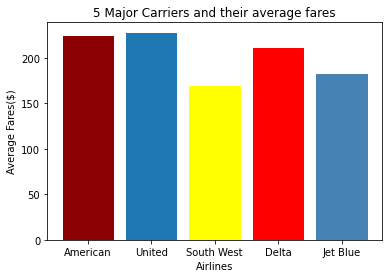

In [8]:
#Generate a bar plot for 5 major carriers and their corresponding fares
aa_average=df.where(df['Carrier_LG']=='AA').mean()['Average_Fare']
ua_average=df.where(df['Carrier_LG']=='UA').mean()['Average_Fare']
sw_average=df.where(df['Carrier_LG']=='WN').mean()['Average_Fare']
dl_average=df.where(df['Carrier_LG']=='DL').mean()['Average_Fare']
jb_average=df.where(df['Carrier_LG']=='B6').mean()['Average_Fare']

Airlines =['American','United','South West','Delta',"Jet Blue"]
pos = np.arange(len(Airlines))
avg_fares = [aa_average,ua_average,sw_average,dl_average,jb_average]

bars=plt.bar(pos, avg_fares, align='center')
bars[0].set_color('darkred')
bars[2].set_color('yellow')
bars[3].set_color('red')
bars[4].set_color('steelblue')
plt.xticks(pos, Airlines)
plt.xlabel('Airlines')
plt.ylabel('Average Fares($)')
plt.title('5 Major Carriers and their average fares')

In [9]:
#Retrieve the busiest airports in terms of volume of domestic passenger traffic
df['Origin'].value_counts()[:10].sort_values(ascending=False)

Atlanta, GA (Metropolitan Area)        5901
Chicago, IL                            5688
Dallas/Fort Worth, TX                  5175
Boston, MA (Metropolitan Area)         4976
Denver, CO                             4129
Houston, TX                            3663
Las Vegas, NV                          3555
Los Angeles, CA (Metropolitan Area)    3510
Detroit, MI                            3036
Charlotte, NC                          2962
Name: Origin, dtype: int64

In [10]:
#Compute the mean fare for Atlanta, Chicago, Dallas and Boston
atl_average=df.where(df['Origin']=='Atlanta, GA (Metropolitan Area)').mean()['Average_Fare']
ord_average=df.where(df['Origin']=='Chicago, IL' ).mean()['Average_Fare']
dfw_average=df.where(df['Origin']=='Dallas/Fort Worth, TX').mean()['Average_Fare']
bos_average=df.where(df['Origin']=='Boston, MA (Metropolitan Area)').mean()['Average_Fare']

/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1299549363.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  atl_average=df.where(df['Origin']=='Atlanta, GA (Metropolitan Area)').mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1299549363.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ord_average=df.where(df['Origin']=='Chicago, IL' ).mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1299549363.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError

Text(0.5, 1.0, '4 Major Airports and Their Average Fares')

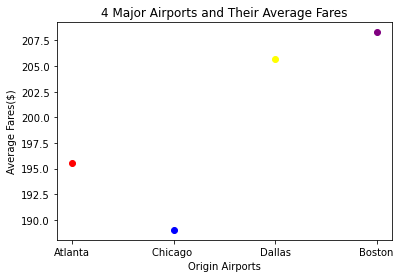

In [11]:
#Generate a scatter plot for 4 of the major airports and their corresponding average fares
Origin =['Atlanta','Chicago ','Dallas','Boston']
pos = np.arange(len(Origin))
origin_fares = [atl_average,ord_average,dfw_average,bos_average]
plt.scatter(Origin[0],origin_fares[0],color='red')
plt.scatter(Origin[1],origin_fares[1],color='blue')
plt.scatter(Origin[2],origin_fares[2],color='yellow')
plt.scatter(Origin[3],origin_fares[3],color='purple')
plt.xlabel('Origin Airports')
plt.ylabel('Average Fares($)')
plt.title('4 Major Airports and Their Average Fares')

/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1929915480.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  q1_average=df.where(df['Quarter']==1).mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1929915480.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  q2_average=df.where(df['Quarter']==2).mean()['Average_Fare']
/var/folders/x7/2p1p8y5d7z73_5lt_c6wsf680000gn/T/ipykernel_74539/1929915480.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling t

Text(0.5, 1.0, 'Average Fares in every Quarter')

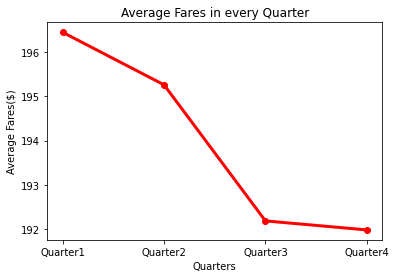

In [12]:
#Generate a line plot for average fares in every quarter
q1_average=df.where(df['Quarter']==1).mean()['Average_Fare']
q2_average=df.where(df['Quarter']==2).mean()['Average_Fare']
q3_average=df.where(df['Quarter']==3).mean()['Average_Fare']
q4_average=df.where(df['Quarter']==4).mean()['Average_Fare']

Quarters =['Quarter1','Quarter2','Quarter3','Quarter4']
pos = np.arange(len(Quarters))
quarter_fares = [q1_average,q2_average,q3_average,q4_average]
plt.plot(Quarters,quarter_fares,'-o',color='red',linewidth=3)

plt.xlabel('Quarters')
plt.ylabel('Average Fares($)')
plt.title('Average Fares in every Quarter')

Text(0.5, 1.0, 'Flying Distance vs Average Fares')

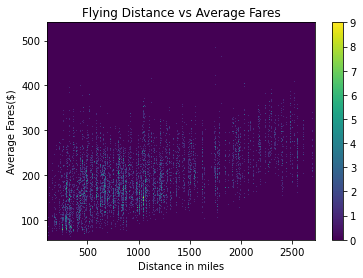

In [13]:
#Generate a heatmap of how air fares varies with distance
plt.figure()
plt.hist2d(df['Distance'],df['Average_Fare'],bins=1000)
plt.colorbar()
plt.xlabel('Distance in miles')
plt.ylabel('Average Fares($)')
plt.title('Flying Distance vs Average Fares')

In [14]:
#Flight fare prediction
df.corr()

,Year,Quarter,Average_Fare,Distance
Year,1.000000,-0.030443,0.230891,0.036285
Quarter,-0.030443,1.000000,-0.030276,0.001594
Average_Fare,0.230891,-0.030276,1.000000,0.529741
Distance,0.036285,0.001594,0.529741,1.000000


In [15]:
#Encoding categorical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_categorical=df.select_dtypes(exclude=["int64","float","int32"])
data_numerical=df.select_dtypes(include=["int64","float","int32"])
data_categorical=data_categorical[['Origin','Destination']]
data_categorical=data_categorical.apply(le.fit_transform)

In [16]:
data_categorical
data_numerical=data_numerical[['Year','Quarter','Distance']]
x=pd.concat([data_categorical,data_numerical],axis=1)
y=df['Average_Fare']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
#Using Random Forest to generate the Training and Testing R2 Scores
random_forest=RandomForestRegressor(n_estimators=100,max_depth=40).fit(X_train,y_train)
print('Training R2 score: {}'.format(random_forest.score(X_train,y_train)))
print('Testing R2 score: {}'.format(random_forest.score(X_test,y_test)))

Training R2 score: 0.9898381301498236
Testing R2 score: 0.9312202790601096


[0.5 1.5 2.5 3.5 4.5]


Text(0.5, 1.0, 'Feature Importance(Random Forest Regressor)')

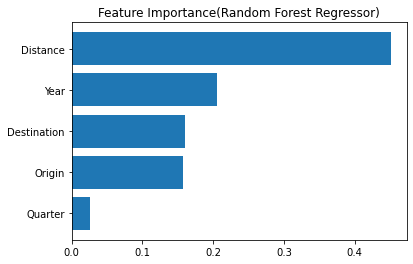

In [21]:
#Generate a horizontal bar plot to retrieve the most important features that affect the air fare
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance(Random Forest Regressor)')